# Bike Sharing

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Covid-19 pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------

## I. Importing Libraries and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read bike sharing data to form a dataframe
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# check the shape of the dataframe
data.shape

(730, 16)

In [4]:
# check for the null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# check data types of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### DATA PREPROCESSING

In [6]:
# drop columns that are redundant
data.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

Reason for dropping the above columns:
 - **instant** : just an index column which is not required in our analysis
 - **dteday** : date column which has been explained by other columns like yr, mnth
 - **casual and registered** : these columns add up to form cnt column

##### Mapping categorical columns with appropriate values

In [7]:
# seasons column is mapped to values spring, summer, fall and winter respectively
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# weekday starting from 0 to 6 is mapped with sunday to saturday
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# weather situation is mapped to values clear, cloudy, light rain/snow and heavy rain/snow respectively
data.weathersit = data.weathersit.map({1:'clear', 2:'cloudy', 3:'light rain/snow', 4:'heavy rain/snow'})

# year is mapped to 2018 and 2019 respectively
data.yr = data.yr.map({0:'2018', 1:'2019'})

In [8]:
# month is mapped in accordance with calender values
data.mnth = data.mnth.map({1:'jan',
                          2:'feb',
                          3:'mar',
                          4:'apr',
                          5:'may',
                          6:'june',
                          7:'july',
                          8:'aug',
                          9:'sep',
                          10:'oct',
                          11:'nov',
                          12:'dec'})

In [9]:
# renaming column names for clarity
data.rename(columns={'yr':'year', 
                     'mnth':'month', 
                     'hum':'humidity', 
                     'cnt':'count',
                     'temp':'temperature',
                     'weathersit':'weather'}, inplace=True)

In [10]:
# rounding of the numerical values to 2 decimal places
numerical_vars = ['temperature','atemp','humidity','windspeed']
data[numerical_vars] = data[numerical_vars].apply(lambda x: round(x,2))

In [11]:
data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,count
0,spring,2018,jan,0,mon,1,cloudy,14.11,18.18,80.58,10.75,985
1,spring,2018,jan,0,tue,1,cloudy,14.90,17.69,69.61,16.65,801
2,spring,2018,jan,0,wed,1,clear,8.05,9.47,43.73,16.64,1349
3,spring,2018,jan,0,thu,1,clear,8.20,10.61,59.04,10.74,1562
4,spring,2018,jan,0,fri,1,clear,9.31,11.46,43.70,12.52,1600


In [12]:
# checking value counts per category in seasons
data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
# checking value counts per category in weather situation
data.weather.value_counts()

clear              463
cloudy             246
light rain/snow     21
Name: weather, dtype: int64

## II. EXPLORATORY DATA ANALYSIS

##### Checking numerical columns for statistical description

In [14]:
data.describe()

,holiday,workingday,temperature,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319329,23.726384,62.765082,12.763699,4508.006849
std,0.167266,0.462641,7.506827,8.150247,14.237634,5.195640,1936.011647
min,0.000000,0.000000,2.420000,3.950000,0.000000,1.500000,22.000000
25%,0.000000,0.000000,13.810000,16.892500,52.000000,9.040000,3169.750000
50%,0.000000,1.000000,20.465000,24.370000,62.625000,12.130000,4548.500000
75%,0.000000,1.000000,26.882500,30.445000,72.990000,15.627500,5966.000000
max,1.000000,1.000000,35.330000,42.040000,97.250000,34.000000,8714.000000


##### Visualizing numerical columns using Pairplots

In [15]:
# choosing style type for plot display
plt.style.use('seaborn-darkgrid')

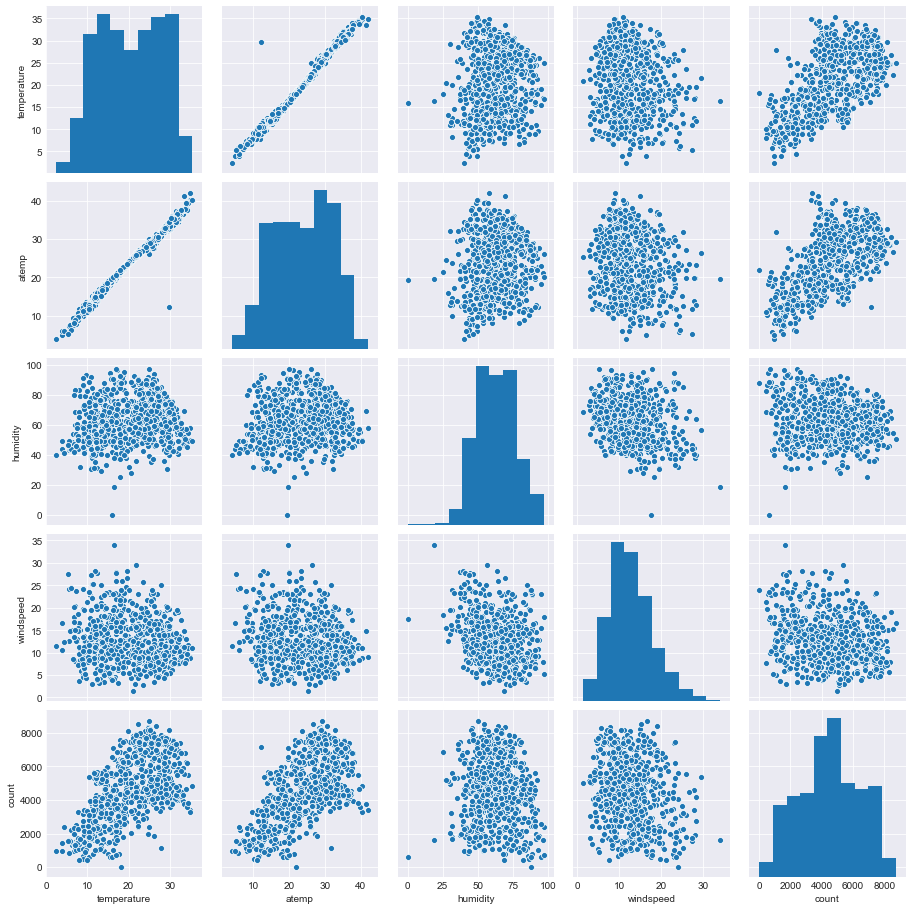

In [16]:
# plotting the numerical variables using seaborn
numerical_vars = ['temperature','atemp','humidity','windspeed','count']
sns.pairplot(data[numerical_vars])
plt.show()

Insights from pairplots:

- temperature vs atemp: a linear relationship is evident here as they are highly collinear
- temperature: a linear trend is visible between count and temperature
- humidity: there seems to be a threshold of 25, below which count is negligible.
- windspeed: count is sparse when windspeed is more than 18 when we compare it with windspeed less than 18.

##### Visualizing categorical columns against target column with boxplots

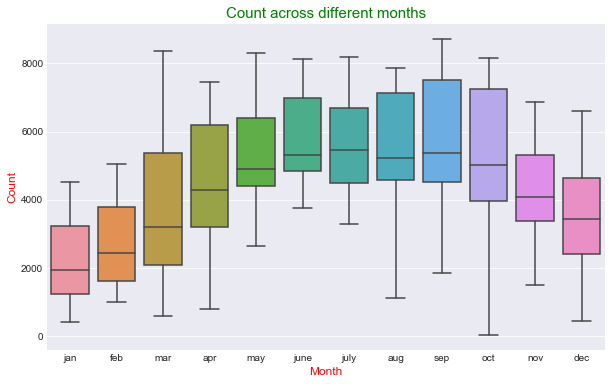

In [17]:
# plot for count across different months
plt.figure(figsize=[10,6])
sns.boxplot(data=data, x='month', y='count')
plt.title('Count across different months', color='g', size=15)
plt.xlabel('Month', color='r', size=12)
plt.ylabel('Count', color='r', size=12)
plt.show()

Insights from the boxplot:
- We see a gradual increase in count till the month of june and then it becomes stable, eventually decreasing by the end of the year
- We can understand this trend clearly once we account for seasons as well

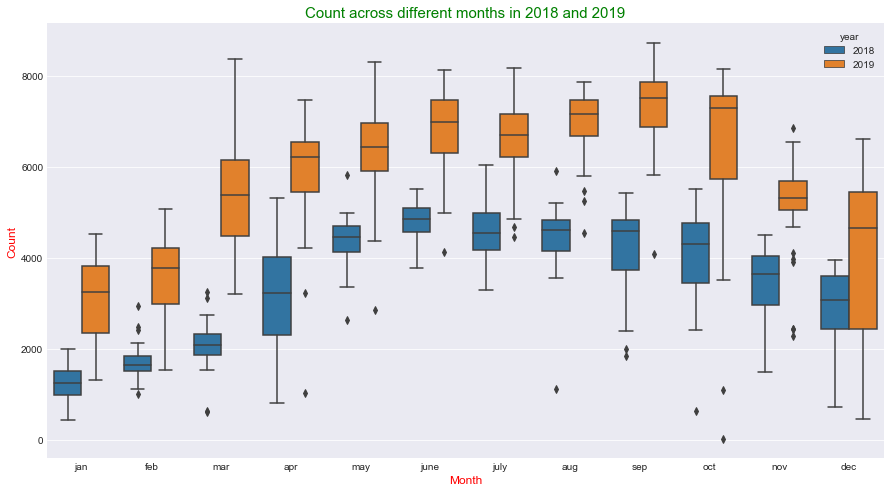

In [18]:
# plot for count across different months in 2018 and 2019
plt.figure(figsize=[15,8])
sns.boxplot(data=data, x='month', y='count', hue='year')
plt.title('Count across different months in 2018 and 2019', color='g', size=15)
plt.xlabel('Month', color='r', size=12)
plt.ylabel('Count', color='r', size=12)
plt.show()

Insights from above plot:
- It is evident in the above plot as well that the trend of gradual increase, then stable trend and eventually a decrease trend is even more enhanced in 2019 as compared to 2018.

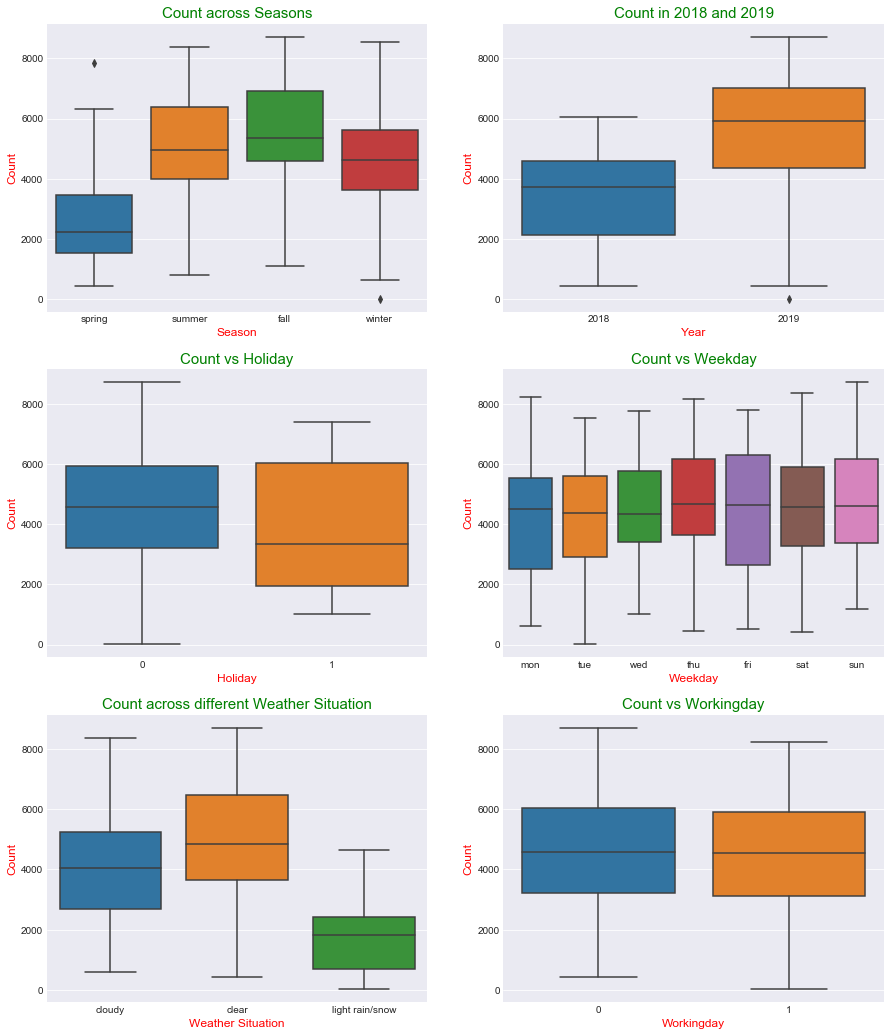

In [19]:
plt.figure(figsize=(15,18))

# subplot for count vs season
plt.subplot(3,2,1)
sns.boxplot(data=data, x='season', y='count')
plt.title('Count across Seasons', size=15, color='g')
plt.xlabel('Season', size=12, color='r')
plt.ylabel('Count', size=12, color='r')

#subplot for count vs year
plt.subplot(3,2,2)
sns.boxplot(data=data, x='year', y='count')
plt.title('Count in 2018 and 2019', size=15, color='g')
plt.ylabel('Count', size=12, color='r')
plt.xlabel('Year', size=12, color='r')

#subplot for count vs holiday
plt.subplot(3,2,3)
sns.boxplot(data=data, x='holiday', y='count')
plt.title('Count vs Holiday', size=15, color='g')
plt.ylabel('Count', size=12, color='r')
plt.xlabel('Holiday', size=12, color='r')

#subplot for count vs weekday
plt.subplot(3,2,4)
sns.boxplot(data=data, x='weekday', y='count')
plt.title('Count vs Weekday', size=15, color='g')
plt.ylabel('Count', size=12, color='r')
plt.xlabel('Weekday', size=12, color='r')

#subplot for count vs weather
plt.subplot(3,2,5)
sns.boxplot(data=data, x='weather', y='count')
plt.title('Count across different Weather Situation', size=15, color='g')
plt.ylabel('Count', size=12, color='r')
plt.xlabel('Weather Situation', size=12, color='r')

#subplot for count vs workingday
plt.subplot(3,2,6)
sns.boxplot(data=data, x='workingday', y='count')
plt.title('Count vs Workingday', size=15, color='g')
plt.ylabel('Count', size=12, color='r')
plt.xlabel('Workingday', size=12, color='r')

plt.show()

Insight from the above subplots:
1. **Season** : A similar trend is visible here as we saw earlier in the months plot
2. **Year** : Company has done much better in the second year i.e 2019 than in 2018
3. **Holiday** : Count has much variance when there is no holiday than when there is a holiday
4. **Weekday** : Mostly all the days show similar traits and hence there is no distinguished trend here
5. **Weather** : As expected, clear and even cloudy weather are favourable for customers than rainy/snowy weather. We do not have any data for heavy rain/snow which is intuitive because of the harsh weather conditions.
6. **Workingday** : There is no impact on count because of a working day or not.

##### Checking collinearity with heatmap

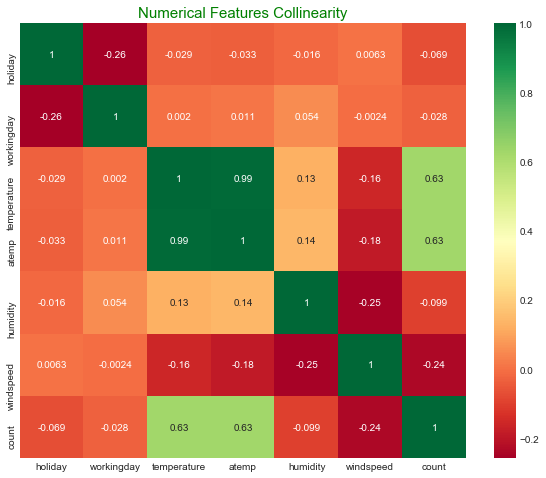

In [20]:
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(), cmap='RdYlGn', annot=True)
plt.title('Numerical Features Collinearity', size=15, color='g')
plt.show()

Insights from the heatmap:
- Year has a positive correlation with count as was previously evident as well in the boxplots
- Temperature and atemp also show high positive correlation with count, which was also the case when we saw the scatterplots
- Temperature and atemp show collinearity of staggering 0.99 which means they are more or less same values

##### Dropping 'atemp' because of its collinearity with 'temperature'

In [21]:
data.drop(columns=['atemp'], inplace=True)

## III. DATA PREPARATION

In [22]:
# year column values are mapped back to 0 and 1 for modelling
data.year = data.year.map({'2018':0, '2019':1})

##### Dummy Variables for categorical columns

In [23]:
# creating dummy variables for columns season, weather, weekday and month respectively and taking care of dummy variable trap
season = pd.get_dummies(data.season, drop_first=True)
weather = pd.get_dummies(data.weather, drop_first=True)
weekday = pd.get_dummies(data.weekday, drop_first=True)
month = pd.get_dummies(data.month, drop_first=True)

In [24]:
weekday.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [25]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
weather.head()

,cloudy,light rain/snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [27]:
month.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


##### Merging original dataset with all the dummy variable columns

In [28]:
data = pd.concat([data,weather,weekday,season,month], axis=1)
data.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,spring,0,jan,0,mon,1,cloudy,14.11,80.58,10.75,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,tue,1,cloudy,14.90,69.61,16.65,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,wed,1,clear,8.05,43.73,16.64,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,thu,1,clear,8.20,59.04,10.74,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.31,43.70,12.52,...,0,0,1,0,0,0,0,0,0,0


##### Dropping columns of which we have dummy variable columns prepared

In [29]:
data.drop(columns=['season','month','weekday','weather'], inplace=True)

In [30]:
# checking the columns after converting required columns to dummy variables
data.columns

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'count', 'cloudy', 'light rain/snow', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

### Splitting the dataset into Train and Test datasets

In [31]:
# splitting train-test data with 70:30 ratio of train and test data 
train, test = train_test_split(data, test_size=0.3, random_state=1)

In [32]:
train.shape

(511, 29)

In [33]:
test.shape

(219, 29)

### Data Scaling using Normalization Technique

In [34]:
scaler = MinMaxScaler()

##### Taking numerical columns that require scaling

In [35]:
numerical_vars = ['temperature','humidity','windspeed','count']

In [36]:
# scaling both train and test data here
train[numerical_vars] = scaler.fit_transform(train[numerical_vars])
test[numerical_vars] = scaler.transform(test[numerical_vars])

In [37]:
# reset indexes for datasets
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [38]:
train.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,cloudy,light rain/snow,mon,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,1,0,1,0.837346,0.405402,0.271724,0.789347,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0.656173,0.743004,0.249288,0.452830,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0.624383,0.393290,0.460114,0.870801,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0.824691,0.597383,0.378561,0.753221,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.441975,0.650842,0.111467,0.481247,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
test.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,cloudy,light rain/snow,mon,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,1,0.608642,0.880969,0.767094,0.309250,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0.537963,0.649032,0.301282,0.445467,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0.948148,0.437282,0.304131,0.447883,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0.613889,0.539468,0.172009,0.856420,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0.798457,0.616595,0.460114,0.755752,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Splitting dataset into X and y

##### 'count' is our Target variable and the rest are Independent variables

In [40]:
# X and y split for train data
y_train = train.pop('count')
X_train = train

In [41]:
# X and y split for test data
y_test = test.pop('count')
X_test = test

In [42]:
y_train.head()

0    0.789347
1    0.452830
2    0.870801
3    0.753221
4    0.481247
Name: count, dtype: float64

In [43]:
X_train.head()

,year,holiday,workingday,temperature,humidity,windspeed,cloudy,light rain/snow,mon,sat,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,1,0,1,0.837346,0.405402,0.271724,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0.656173,0.743004,0.249288,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0.624383,0.393290,0.460114,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0.824691,0.597383,0.378561,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.441975,0.650842,0.111467,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
y_test.head()

0    0.309250
1    0.445467
2    0.447883
3    0.856420
4    0.755752
Name: count, dtype: float64

In [45]:
X_test.head()

,year,holiday,workingday,temperature,humidity,windspeed,cloudy,light rain/snow,mon,sat,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,1,0.608642,0.880969,0.767094,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0.537963,0.649032,0.301282,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0.948148,0.437282,0.304131,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0.613889,0.539468,0.172009,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0.798457,0.616595,0.460114,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


##### Confirming the shape of train-test data

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 28)
(219, 28)
(511,)
(219,)


## IV. MODEL BUILDING

### 1. All Features

In [47]:
# building model with statsmodels OLS
X_train_const = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_const).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     87.94
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          8.23e-170
Time:                        16:08:34   Log-Likelihood:                 513.92
No. Observations:                 511   AIC:                            -969.8
Df Residuals:                     482   BIC:                            -847.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4004      0.085     

In [48]:
# predict training target variable
y_pred_train = lr_1.predict(X_train_const)

##### Predicting on test data

In [49]:
# add constant on test data for sm OLS 
X_test_const = sm.add_constant(X_test)

# predict on test data using previous model
y_pred = lr_1.predict(X_test_const)

### Model Evaluation

##### R-squared

In [50]:
# train data
train_score = r2_score(y_train, y_pred_train)
train_score

0.8362977568664781

In [51]:
# test data
test_score = r2_score(y_test, y_pred)
test_score

0.8535950734180264

In [52]:
# check the independent variable coefficients in the model
lr_1.params

const              0.400416
year               0.233247
holiday           -0.124713
workingday        -0.069323
temperature        0.423816
humidity          -0.151648
windspeed         -0.160883
cloudy            -0.036026
light rain/snow   -0.212845
mon               -0.027454
sat               -0.069424
sun               -0.043525
thu                0.003595
tue               -0.020420
wed               -0.018763
spring            -0.074980
summer             0.025269
winter             0.067582
aug                0.003966
dec               -0.036792
feb               -0.028989
jan               -0.052332
july              -0.028630
june              -0.004174
mar                0.036442
may                0.031830
nov               -0.029684
oct                0.037048
sep                0.079253
dtype: float64

### 2. Feature Selection

### a. Automatic Feature Selection using RFE

In [53]:
# fit train data on sklearn linear model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### RFE with Top 15 features

In [54]:
# use linear model and select top features
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [55]:
# view the ranking of all feature columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('cloudy', True, 1),
 ('light rain/snow', True, 1),
 ('mon', False, 9),
 ('sat', False, 2),
 ('sun', False, 4),
 ('thu', False, 14),
 ('tue', False, 10),
 ('wed', False, 11),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('aug', False, 12),
 ('dec', False, 6),
 ('feb', False, 8),
 ('jan', False, 5),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', False, 7),
 ('oct', True, 1),
 ('sep', True, 1)]

##### Extracting only the top 15 independent variables for modelling

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'cloudy', 'light rain/snow', 'spring', 'winter', 'july', 'mar', 'may',
       'oct', 'sep'],
      dtype='object')

In [57]:
# X_train prepared with the top selected features
X_train_rfe = X_train[col]

##### Modelling with features extracted through automatic feature selection technique

In [58]:
# add constant on train data
X_train_new = sm.add_constant(X_train_rfe)

# fit model with train data
lr_2 = sm.OLS(y_train, X_train_new).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          3.61e-180
Time:                        16:08:34   Log-Likelihood:                 506.15
No. Observations:                 511   AIC:                            -980.3
Df Residuals:                     495   BIC:                            -912.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3418      0.029     

In [59]:
# predict training target variable
y_pred_train = lr_2.predict(X_train_new)

##### Predicting on test data

In [60]:
# select top 15 features for test data
X_test_rfe = X_test[col]

# add constant on test data
X_test_const = sm.add_constant(X_test_rfe)

# predict test target variable
y_pred = lr_2.predict(X_test_const)

### Model Evaluation

##### R-squared

In [61]:
# train data
train_score = r2_score(y_train, y_pred_train)
train_score

0.8312404524572962

In [62]:
# test data
test_score = r2_score(y_test, y_pred)
test_score

0.8553403391741343

In [63]:
# check the independent variables coefficient in the model
lr_2.params

const              0.341828
year               0.233502
holiday           -0.090671
workingday        -0.024312
temperature        0.440974
humidity          -0.156724
windspeed         -0.155475
cloudy            -0.034795
light rain/snow   -0.209040
spring            -0.117893
winter             0.032683
july              -0.042695
mar                0.064911
may                0.047272
oct                0.064287
sep                0.079648
dtype: float64

### b. Fine Tuning with Manual Feature Selection

Features with the following values will be selected:
- **P-value < 0.05**
- **VIF < 5.0**

##### Defining VIF function to keep a check on Multicollinearity

In [64]:
def vif(X_data):
    vif = pd.DataFrame()
    X = X_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    vif.reset_index(inplace=True, drop=True)
    return vif

In [65]:
# checking mulitcollinearity of the model obtained from automatic selection technique with 15 features
vif(X_train_rfe)

,Features,VIF
0,humidity,15.62
1,temperature,13.51
2,windspeed,5.05
3,workingday,3.62
4,winter,2.62
5,cloudy,2.47
6,spring,2.31
7,year,2.03
8,july,1.58
9,oct,1.54


We can observe from above VIF table that 'humidity' feature has high multi-collinearity and hence we will be better without it.

##### Dropping 'humidity' column and rebuilding the model with updated data

In [66]:
X_train_rfe = X_train_rfe.drop(['humidity'], axis=1)

# add const on transformed X_train dataset
X_train_new = sm.add_constant(X_train_rfe)

# fit model on training data
lr = sm.OLS(y_train, X_train_new).fit()
print(lr.summary())
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     164.2
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          6.34e-176
Time:                        16:08:34   Log-Likelihood:                 493.34
No. Observations:                 511   AIC:                            -956.7
Df Residuals:                     496   BIC:                            -893.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2834      0.027     

,Features,VIF
0,temperature,6.83
1,windspeed,4.95
2,workingday,3.56
3,winter,2.04
4,year,2.01
5,spring,1.83
6,july,1.55
7,oct,1.53
8,cloudy,1.49
9,may,1.31


We can observe from above VIF table that 'temperature' feature has high multi-collinearity but from our EDA we observe how important it is due to its linear relationship with our target variable.

So here we will find another approach to bring the multicollinearity of temperature down by tackling the other features that are collinear with temperature but haven't shown significant relationship with our count variable.

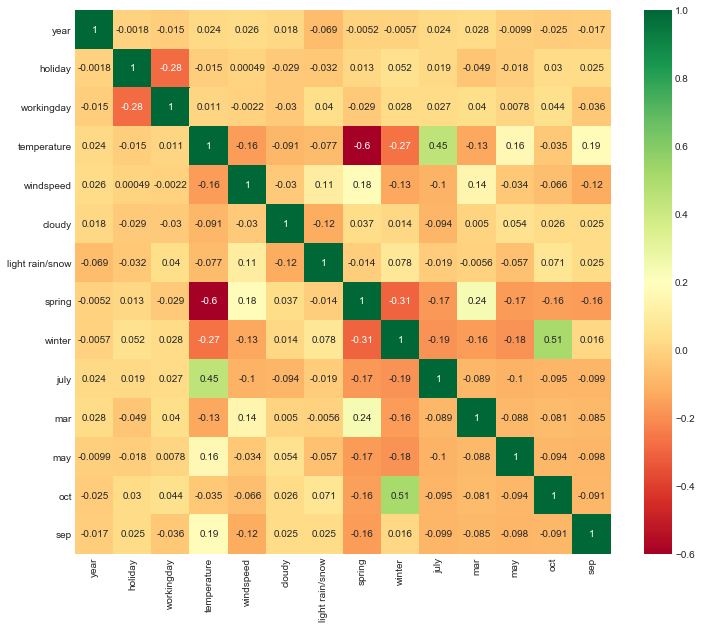

In [67]:
# plot heatmap to visualize the correlation between X_train features
plt.figure(figsize=[12,10])
sns.heatmap(X_train_rfe.corr(), cmap='RdYlGn', annot=True)
plt.show()

 We can drop july column as we see some collinearity with temperature column.

##### Dropping 'july' column and rebuilding the model with updated data

In [68]:
X_train_rfe = X_train_rfe.drop(['july'], axis=1)

# add const on transformed X_train dataset
X_train_new = sm.add_constant(X_train_rfe)

# fit model on training data
lr = sm.OLS(y_train, X_train_new).fit()
print(lr.summary())
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     175.2
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          4.79e-176
Time:                        16:08:36   Log-Likelihood:                 490.93
No. Observations:                 511   AIC:                            -953.9
Df Residuals:                     497   BIC:                            -894.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2923      0.027     

,Features,VIF
0,temperature,5.39
1,windspeed,4.83
2,workingday,3.56
3,year,2.01
4,winter,2.01
5,spring,1.83
6,oct,1.52
7,cloudy,1.48
8,may,1.22
9,sep,1.20


As we can observe that winter column has unacceptable P-value, we will drop it.

##### Dropping 'winter' column and rebuilding the model with updated data

In [69]:
X_train_rfe = X_train_rfe.drop(['winter'], axis=1)

# add const on transformed X_train dataset
X_train_new = sm.add_constant(X_train_rfe)

# fit model on training data
lr = sm.OLS(y_train, X_train_new).fit()
print(lr.summary())
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          7.68e-177
Time:                        16:08:36   Log-Likelihood:                 490.09
No. Observations:                 511   AIC:                            -954.2
Df Residuals:                     498   BIC:                            -899.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3140      0.021     

,Features,VIF
0,temperature,5.20
1,windspeed,4.64
2,workingday,3.35
3,year,1.97
4,spring,1.68
5,cloudy,1.46
6,may,1.19
7,sep,1.19
8,mar,1.17
9,oct,1.15


 - Till here, we can say that our model is ready according to our VIF and P-value rules for significance with slight exception to temperature feature.
 - We will try to reduce its multicollinearity with few further steps

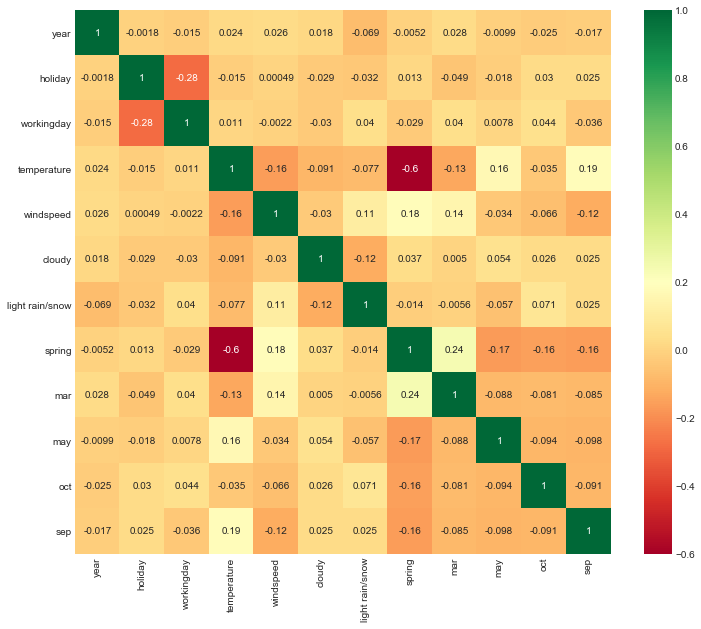

In [70]:
# plot the heatmap for collinearity
plt.figure(figsize=[12,10])
sns.heatmap(X_train_rfe.corr(), cmap='RdYlGn', annot=True)
plt.show()

Workingday and holiday are complementary since they convey the same information differently. Hence, we will drop workingday as it was less significant than holiday in our EDA.

##### Dropping 'workingday' column and rebuilding the model with updated data

In [71]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

# add const on transformed X_train dataset
X_train_new = sm.add_constant(X_train_rfe)

# fit model on training data
lr = sm.OLS(y_train, X_train_new).fit()
print(lr.summary())
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          2.02e-176
Time:                        16:08:37   Log-Likelihood:                 486.33
No. Observations:                 511   AIC:                            -948.7
Df Residuals:                     499   BIC:                            -897.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2942      0.020     

,Features,VIF
0,windspeed,4.48
1,temperature,4.27
2,year,1.96
3,spring,1.63
4,cloudy,1.46
5,may,1.19
6,sep,1.19
7,mar,1.17
8,oct,1.13
9,light rain/snow,1.08


- Finally, our model is statistically significant with P-value and VIF under acceptable values for our features.
- Although, now we observe that our model has too many features. It is best to have lesser features to explain our target variable well.

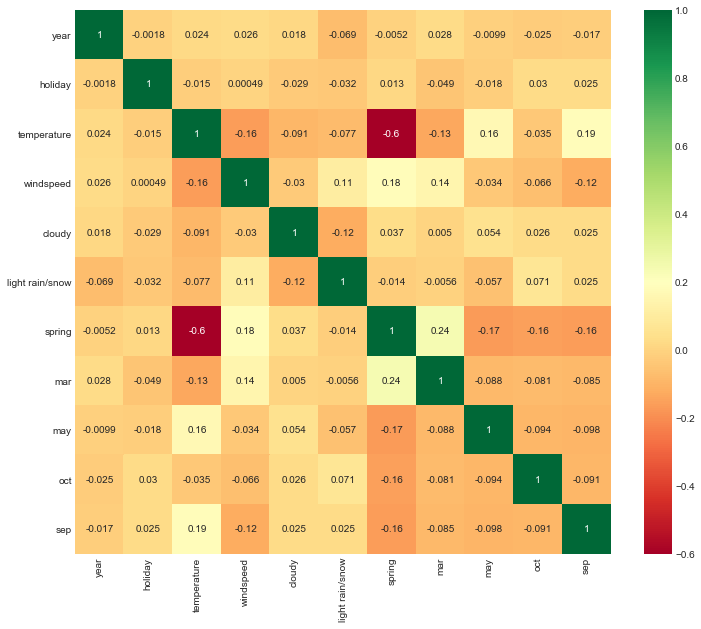

In [72]:
# plot the heatmap for collinearity
plt.figure(figsize=[12,10])
sns.heatmap(X_train_rfe.corr(), cmap='RdYlGn', annot=True)
plt.show()

We can observe that there is some correlation between march and spring which is intuitive since march is indeed one of the spring season months.

##### Dropping 'march' column and rebuilding the model with updated data

In [73]:
X_train_rfe = X_train_rfe.drop(['mar'], axis=1)

# add const on transformed X_train dataset
X_train_new = sm.add_constant(X_train_rfe)

# fit model on training data
lr = sm.OLS(y_train, X_train_new).fit()
print(lr.summary())
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     216.8
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          1.19e-174
Time:                        16:08:38   Log-Likelihood:                 479.35
No. Observations:                 511   AIC:                            -936.7
Df Residuals:                     500   BIC:                            -890.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2928      0.020     

,Features,VIF
0,windspeed,4.43
1,temperature,4.27
2,year,1.96
3,spring,1.57
4,cloudy,1.46
5,may,1.19
6,sep,1.19
7,oct,1.13
8,light rain/snow,1.08
9,holiday,1.04


Although, the P-value for 'may' column is acceptable but since our aim is to fine tune our model, we will better off with dropping it.

##### Dropping 'may' column and rebuilding the model with updated data

In [74]:
X_train_rfe = X_train_rfe.drop(['may'], axis=1)

# add const on transformed X_train dataset
X_train_new = sm.add_constant(X_train_rfe)

# fit model on training data
lr_3 = sm.OLS(y_train, X_train_new).fit()
print(lr_3.summary())
vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     238.0
Date:                Sat, 24 Oct 2020   Prob (F-statistic):          1.24e-174
Time:                        16:08:38   Log-Likelihood:                 476.47
No. Observations:                 511   AIC:                            -932.9
Df Residuals:                     501   BIC:                            -890.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2954      0.020     

,Features,VIF
0,windspeed,4.43
1,temperature,4.09
2,year,1.96
3,spring,1.55
4,cloudy,1.45
5,sep,1.16
6,oct,1.11
7,light rain/snow,1.08
8,holiday,1.04


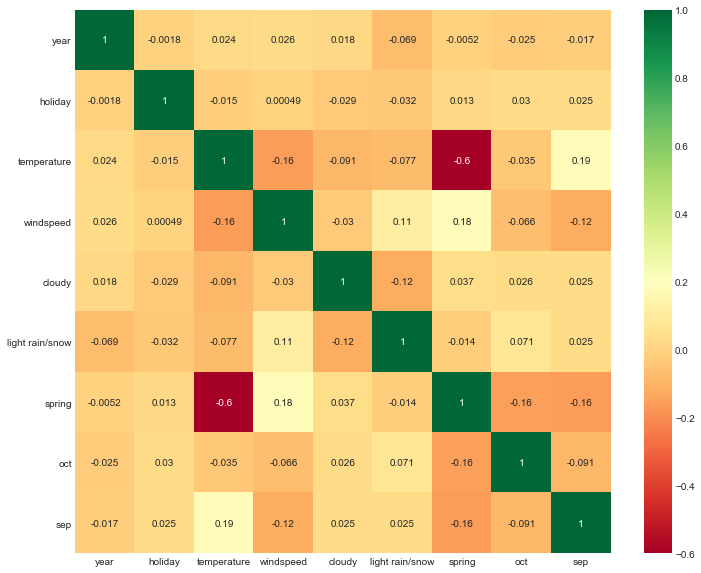

In [75]:
# plot the heatmap for collinearity
plt.figure(figsize=[12,10])
sns.heatmap(X_train_rfe.corr(), cmap='RdYlGn', annot=True)
plt.show()

Finally, we have our model ready which is a perfect balance between the number of independent variables and target variable's variance explaination.

##### Checking for assumptions

In [76]:
# predict train target variable on the above obtained model
y_pred_train = lr_3.predict(X_train_new)

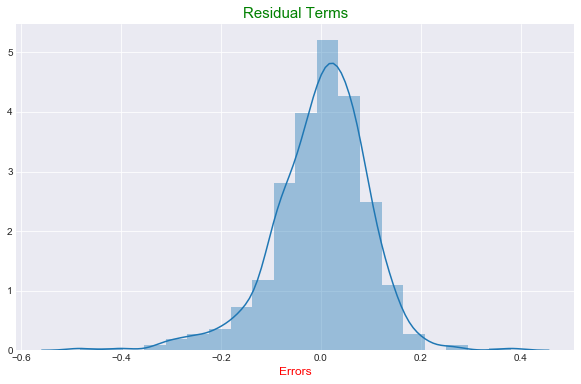

In [77]:
# plot residual plot for errors between actual and predicted train target variable
plt.figure(figsize=[10,6])
sns.distplot((y_train-y_pred_train), bins=20)
plt.title('Residual Terms', size=15, color='g')
plt.xlabel('Errors', size=12, color='r')
plt.show()

The Residual plot clearly shows that the error terms follow Normal Distribution centered around 0 and with approximately equal Standard Deviation.

##### Preparing test data by extracting important features derived from feature selection process

In [78]:
# extract required features from test dataset according to train dataset columns
X_test_new = X_test[X_train_rfe.columns]

# add constant on test data
X_test_new = sm.add_constant(X_test_new)

#### Predicting on test data

In [79]:
y_pred = lr_3.predict(X_test_new)

##### Plotting test target variable vs predicted target variable

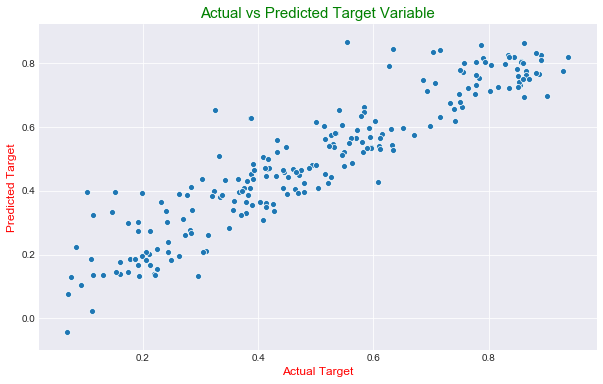

In [80]:
plt.figure(figsize=[10,6])
sns.scatterplot(y_test, y_pred)
plt.title('Actual vs Predicted Target Variable', size=15, color='g')
plt.xlabel('Actual Target', size=12, color='r')
plt.ylabel('Predicted Target', size=12, color='r')
plt.show()

Linear Relationship between Actual Target variable and Predicted Target variable is also visible.

### MODEL EVALUATION

##### R-squared

In [81]:
# train data
train_score = r2_score(y_train, y_pred_train)
train_score

0.8104551749590819

In [82]:
# test data
test_score = r2_score(y_test, y_pred)
test_score

0.8493255930370609

##### Mean Squared Error

In [83]:
# train data
train_mse = mean_squared_error(y_train, y_pred_train)
train_mse

0.009070322780319516

In [84]:
# test data
test_mse = mean_squared_error(y_test, y_pred)
test_mse

0.007953382391362588

In [85]:
# check the independent variable coefficients in the model
lr_3.params

const              0.295448
year               0.241379
holiday           -0.077317
temperature        0.361415
windspeed         -0.111453
cloudy            -0.067042
light rain/snow   -0.289680
spring            -0.136145
oct                0.068722
sep                0.071506
dtype: float64

## Results

We achieved the final model with appreciable R-score and MSE while keeping the number of features lesser than the features achieved with more complex and redundant models 1 (all features included) and 2 (top 15 features). In our final model, we are including features only that are statistically significant and free from any high multicollinearity by measuring P-values and VIF at each step.

### Linear Regression Equation for the final model

**count = 0.29 + (0.24 x year) - (0.07 x holiday) + (0.36 x temperature) - (0.11 x windspeed) - (0.07 x cloudy) - (0.29 x light_rain/snow) - (0.14 x spring) + (0.07 x october) + (0.07 x september)**

### Business Problem

#### Which variables are significant in predicting the demand for shared bikes?

The following variables are significant in predicting the demand for shared bikes:

1. Year
2. Holiday
3. Temperature
4. Wind speed
5. Weather:
 - Cloudy
 - Light Rain/Snow
6. Season:
 - Spring
7. Month:
 - September
 - October

#### How well those variables describe the bike demands?

We obtained R-squared score of 0.81 in case of our training data and 0.85 in case of our testing data.

Therefore, the independent variables in the model are able to explain 85% of the bike count variance on an unseen dataset with a Mean squared error of 0.8%.

#### Observations

The Bike sharing company BoomBikes should keep a track on above variables while making new marketing as well as financing strategies. 
1. We observe that as temperature rises the count of shared bikes increases. Hence, summers are essentially ideal conditions for bike sharing.
2. In harsh weather conditions like rain/snow or even cloudy, the count decreases drastically and people prefer pleasant weather like clear sky, sunny day for bike sharing. 
3. Windspeed is another variable which should be taken into consideration as windspeed increases, we see lesser bike sharing as compared to bike sharing is low windspeeds.
4. In year 2019 the company did much better which shows that the company is growing in the right direction and just need to take in account for other variables that decide on weather conditions to drive the sharing counts.

#### Recommendations

- We recommend BoomBikes to come up with marketing and sales strategies with offers and discounts for its customers in harsh weather conditions like cloudy, rainy and snowy days so that customers have some incentives to choose their product over its competitors.
- At the same time, BoomBikes can take advantage of holiday seasons to agressively steer their marketing campaigns as well as strategies to compensate the increased demands and customer traffic in ideal weather conditions like sunny and clear days and summer season.
- Accordingly the company can decide on its inventory expenditures to generate revenues and profits from the insights provided.